# Sales Data Analysis using Python

To analyze sales transaction data and identify trends, patterns, and insights related to products, customers, and regions.


In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv("data.csv", encoding="latin1")
# Loading the Data

## Data Overview
Understanding the structure and basic characteristics of the dataset.

In [12]:
df.head()
#Understanding the Data Structure

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
df.info()
#Understanding the Data Structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Missing Value Analysis
Checking data quality and completeness.


In [15]:
df.isnull().sum()
#Checking for Missing Values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Sales Distribution Analysis
Analyzing quantity and pricing patterns.

In [16]:
df.describe()
#Basic Data Exploration

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [19]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [22]:
print(df['Country'].unique())
#Basic Data Exploration

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [24]:
df['Country'].value_counts()
#Basic Data Exploration

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [26]:
df['total_sales']=df['Quantity']*df['UnitPrice']
#Calculated Total Sales

In [30]:
sales_by_country=df.groupby('Country')['total_sales'].sum().sort_values(ascending=False)
#Grouped and Summarized Sales by Country

In [31]:
print(sales_by_country)

Country
United Kingdom          8187806.364
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

In [32]:
import matplotlib.pyplot as plt

In [33]:
import seaborn as sns

In [34]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

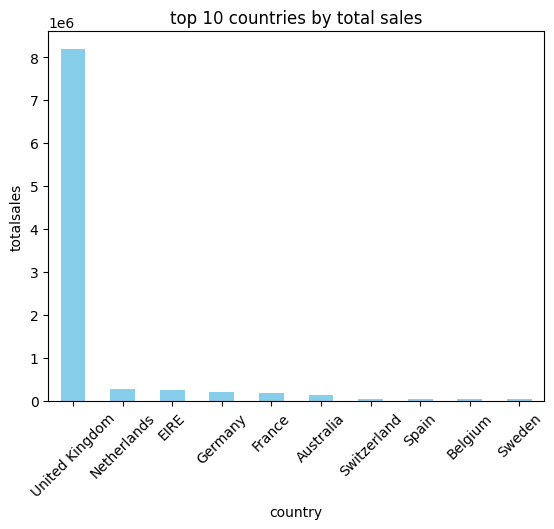

In [37]:
sales_by_country.head(10).plot(kind='bar',color='skyblue')
plt.title('top 10 countries by total sales')
plt.xlabel('country')
plt.ylabel('totalsales')
plt.xticks(rotation=45)
plt.show()

In [43]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [46]:
df['month']=df['InvoiceDate'].dt.to_period('M')

In [51]:
monthlySales=df.groupby('month')['total_sales'].sum()

In [52]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

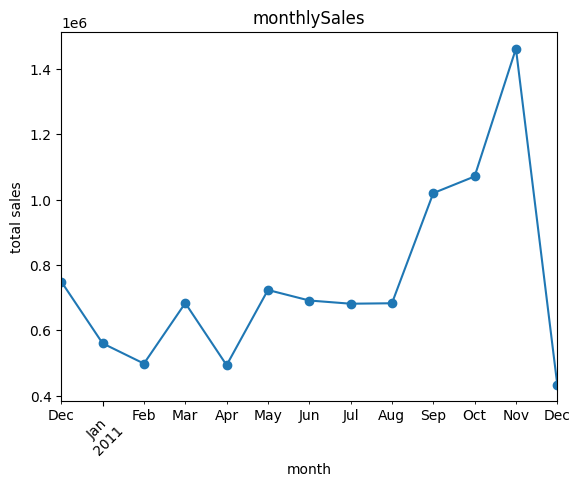

In [58]:
monthlySales.plot(kind='line',marker='o')
plt.title("monthlySales")
plt.xlabel('month')
plt.ylabel('total sales')
plt.xticks(rotation=45)
plt.show()

In [65]:
customerSales=df.groupby('CustomerID')['total_sales'].sum().sort_values(ascending=False)
print(customerSales.head(10))

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: total_sales, dtype: float64


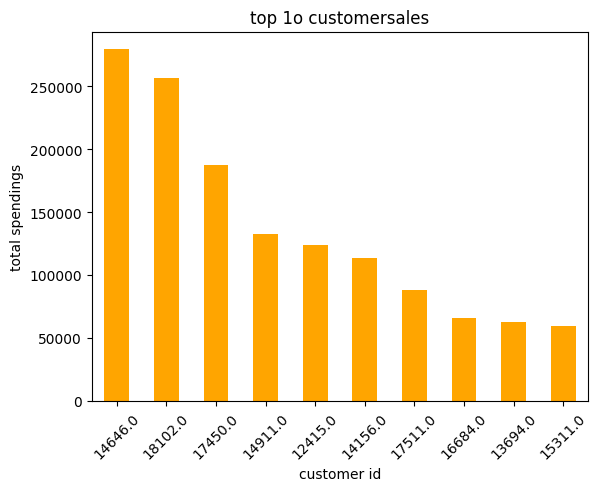

In [71]:
customerSales.head(10).plot(kind='bar',color='orange')
plt.title('top 1o customersales')
plt.xlabel('customer id')
plt.ylabel('total spendings')
plt.xticks(rotation=45)
plt.show()

In [73]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

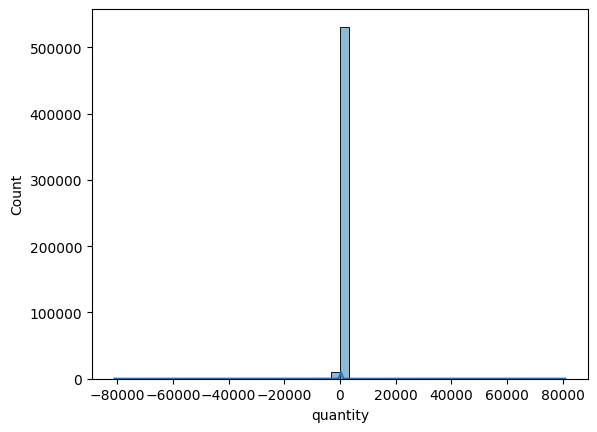

In [78]:
sns.histplot(df['Quantity'],bins=50,kde=True)
plt.title=('Distribution of Quantity Sold')
plt.xlabel('quantity')
plt.show()

In [ ]:
## Key Insights

- Majority of transactions are from the United Kingdom, indicating regional sales concentration.
- A small number of products contribute to a large portion of total quantity sold.
- Negative quantities highlight potential returns or cancellations that need separate handling.